In [2]:
#import pustaka
import pandas as pd
import numpy as np

In [4]:
# 1. Dataset untuk Scikit-Learn
# Boston Housing (Regresi)
np.random.seed(42)
boston_housing = pd.DataFrame({
    'RM': np.random.normal(6, 0.5, 100),  # Jumlah kamar rata-rata
    'LSTAT': np.random.uniform(2, 30, 100),  # Persentase penduduk dengan status ekonomi rendah
    'PTRATIO': np.random.uniform(12, 22, 100),  # Rasio murid-guru
    'MEDV': np.random.normal(25, 5, 100)  # Harga rumah (dalam ribuan dolar)
})

In [6]:
# Dataset Iris (Klasifikasi)
iris = pd.DataFrame({
    'sepal_length': np.random.normal(5.8, 0.4, 150),
    'sepal_width': np.random.normal(3.0, 0.3, 150),
    'petal_length': np.random.normal(3.7, 1.5, 150),
    'petal_width': np.random.normal(1.2, 0.5, 150),
    'species': np.random.choice(['setosa', 'versicolor', 'virginica'], 150)
})

In [10]:
# Dataset Clustering (Segmentasi Pelanggan)
customer_segmentation = pd.DataFrame({
    'income': np.random.normal(50000, 15000, 200),  # Pendapatan tahunan
    'spending_score': np.random.uniform(1, 100, 200),  # Skor pengeluaran
    'age': np.random.randint(18, 70, 200)  # Usia
})

In [12]:
# 2. Dataset untuk Statsmodels
# Dataset Regresi Linear (Luas Rumah vs Harga)
house_price = pd.DataFrame({
    'house_size': np.random.normal(150, 50, 100),  # Ukuran rumah dalam meter persegi
    'price': np.random.normal(500, 150, 100)  # Harga dalam juta IDR
})

In [14]:
# - Dataset Time Series (Harga Saham)
dates = pd.date_range(start="2020-01-01", periods=100, freq='D')
stock_prices = pd.DataFrame({
    'date': dates,
    'stock_price': np.cumsum(np.random.normal(0, 1, 100)) + 100  # Harga saham sintetis
})

In [16]:
# 3. Dataset untuk Scipy
# Dataset untuk uji statistik
t_test_data = pd.DataFrame({
    'group': np.random.choice(['A', 'B'], 200),
    'height': np.random.normal(170, 10, 200),
    'weight': np.random.normal(70, 15, 200)
})

In [18]:
# Dataset untuk optimasi
optimization_data = pd.DataFrame({
    'x': np.linspace(-10, 10, 100),
    'y': np.sin(np.linspace(-10, 10, 100)) + np.random.normal(0, 0.1, 100)
})

In [22]:
#Latihan Statsmodel
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [26]:
# Load dataset
df = pd.read_csv("D:/Portofolio/Python/Statsmodel/stock_prices.csv", parse_dates=["date"], index_col="date")

In [28]:
# Tampilkan 5 data pertama
print(df.head())

            stock_price
date                   
2020-01-01    99.401632
2020-01-02   101.042679
2020-01-03   101.291877
2020-01-04   101.713351
2020-01-05   102.160710


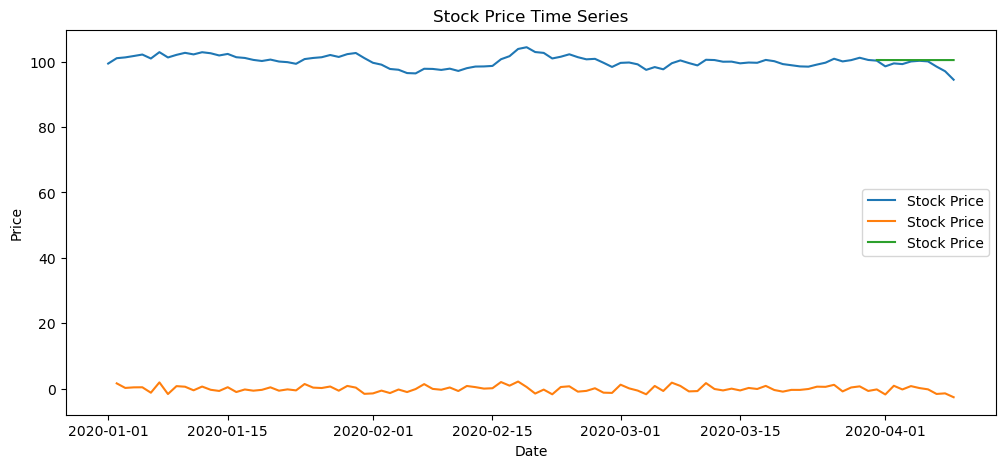

In [66]:
#bikin visualisasi
plt.figure(figsize=(12, 5))
plt.plot(df, label="Stock Price")
plt.title("Stock Price Time Series")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

#simpan data
plt.savefig("Stock_Prices.png", dpi=300, bbox_inches='tight')

#tampilkan
plt.show()

In [32]:
# Simpan sebelum menampilkan
plt.savefig("Stock Price_plot.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [34]:
#Uji Stasioneritas dengan Augmented Dickey-Fuller Test
result = adfuller(df["stock_price"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("Data stasioner (Tolak H0)")
else:
    print("Data tidak stasioner (Gagal Tolak H0)")

ADF Statistic: -1.9379190896936354
p-value: 0.31443831757451945
Data tidak stasioner (Gagal Tolak H0)


In [36]:
#Menstabilkan Tren (=! stasioner)
df["stock_price_diff"] = df["stock_price"].diff().dropna()

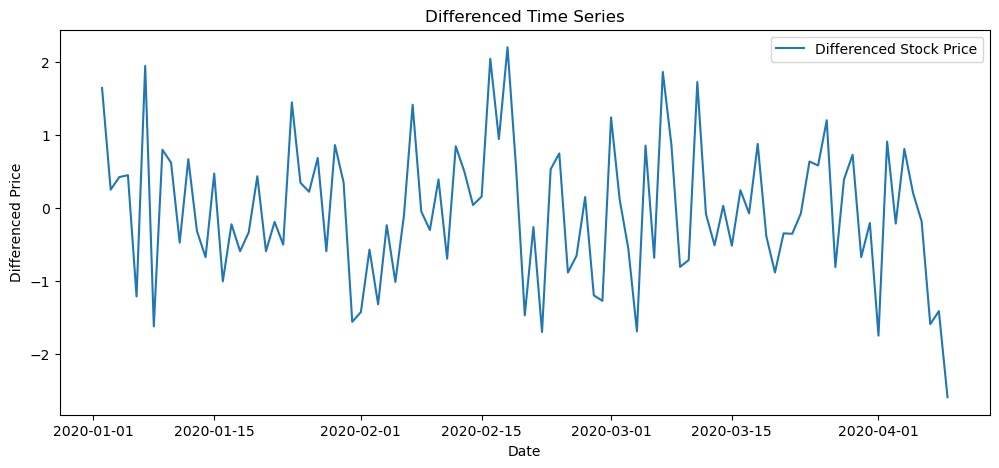

In [56]:
#visualisasi setelahnya differenced data
plt.figure(figsize=(12, 5))
plt.plot(df["stock_price_diff"], label="Differenced Stock Price")
plt.title("Differenced Time Series")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.legend()

# Simpan gambar sebelum menampilkan
plt.savefig("Differenced_Time_Series.png", dpi=300, bbox_inches='tight')

# Tampilkan plot
plt.show()

In [42]:
# Model ARIMA (p=1, d=1, q=1)
model = ARIMA(df["stock_price"], order=(1, 1, 1))
result = model.fit()

C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [44]:
# Summary Model
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            stock_price   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -134.619
Date:                Tue, 04 Mar 2025   AIC                            275.239
Time:                        10:14:40   BIC                            283.024
Sample:                    01-01-2020   HQIC                           278.389
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5085      1.274      0.399      0.690      -1.988       3.005
ma.L1         -0.4500      1.324     -0.340      0.734      -3.046       2.146
sigma2         0.8884      0.137      6.485      0.0

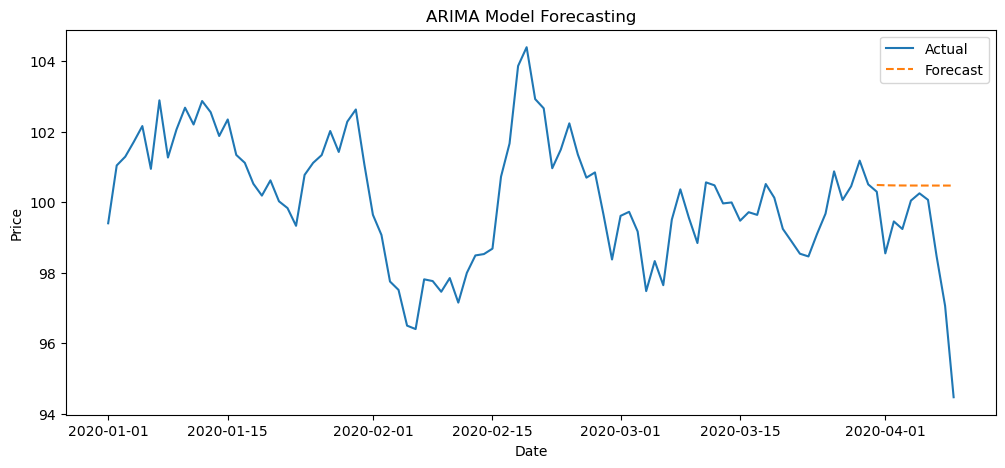

In [54]:
#prediksi arima
df["forecast"] = result.predict(start=len(df)-10, end=len(df)+10, dynamic=True)

plt.figure(figsize=(12, 5))
plt.plot(df["stock_price"], label="Actual")
plt.plot(df["forecast"], label="Forecast", linestyle="dashed")
plt.title("ARIMA Model Forecasting")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Simpan gambar sebelum menampilkan
plt.savefig("Arima_Model_Forecasting.png", dpi=300, bbox_inches='tight')

# Tampilkan plot
plt.show()